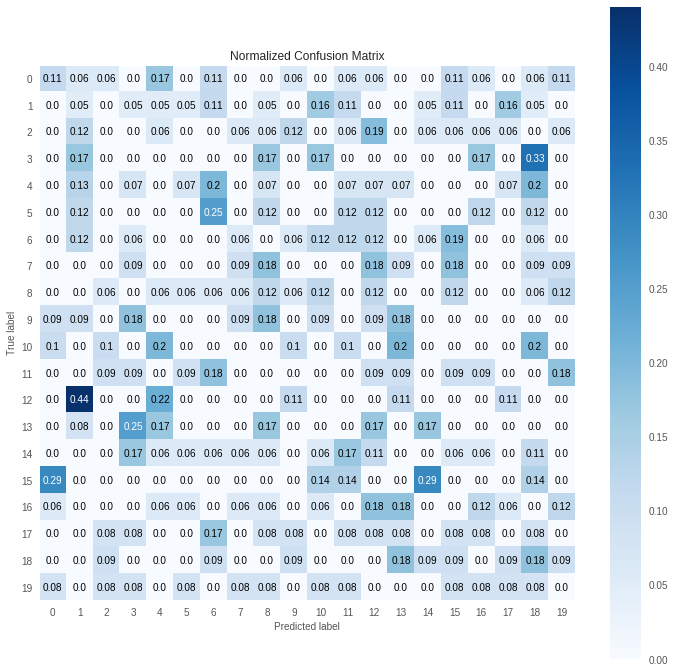

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from DatasetAPPM import DatasetAPPM
from Nets import TheNet
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import sys
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import scikitplot as skplt
import seaborn as sns
import pandas as pd

def class_to_id(classes):

  class_id = {'ALA' : 0, 'ARG' : 1, 'ASN' : 2, 'ASP' : 3, 'CYS' : 4, 'GLU' : 5,
         'GLN' : 6, 'GLY' : 7, 'HIS' : 8, 'ILE' : 9, 'LEU' : 10, 'LYS' : 11,
         'MET' : 12, 'PHE' : 13, 'PRO' : 14, 'SER' : 15, 'THR' : 16, 'TRP' : 17, 'TYR' : 18,
         'VAL' : 19}

  for i in range(0,len(classes)):
    classes[i] = class_id[classes[i]]

  return classes
        
def id_to_class(ids):

  id_class = {0 : 'ALA', 1 : 'ARG', 2 : 'ASN', 3 : 'ASP', 4 : 'CYS', 5 : 'GLU',
          6 : 'GLN', 7 : 'GLY', 8 : 'HIS', 9 : 'ILE', 10 : 'LEU', 11 : 'LYS',
          12 : 'MET', 13 : 'PHE', 14 : 'PRO', 15 : 'SER', 16 : 'THR', 17 : 'TRP', 18 : 'TYR',
          19 : 'VAL'}

  for i in range(0,len(ids)):
    ids[i] = id_class[ids[i]]

  return ids

'''
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
  
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    return plt
'''

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

if __name__ == "__main__":
  
  classes = ['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']
  '''
  trainset_path = sys.argv[1]
  weights_path = sys.argv[2]

  #Define device
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(device)

  #Define pre-training data transformations
  transform = transforms.Compose(
    [transforms.ToTensor()])

  #Load Train set for inference
  print('Loading trainset...')

  trainset = DatasetAPPM(trainset_path,transform = transform)

  trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                           shuffle=False, num_workers=0)
  print('Validationset loaded.')

  #Load Net model
  model = TheNet()
  model.load_state_dict(torch.load(weights_path + 'weights.pth',map_location='cpu'))
  
  print('Neural network evaluation mode activated!!!')
  model.eval()
  '''
  all_labels = []
  all_predictions = []
  '''
  with torch.no_grad():
      for data in trainloader:
          grids, labels, resIdx = data
          print(labels)
          #output = model(grids)
          output = np.random.randint(20, size=len(labels))
          all_labels = all_labels + labels.numpy().tolist()
          all_predictions = all_predictions + output.tolist()
          print(output)

          #_, predicted = torch.max(output.data, 1)
  '''

  all_labels = np.random.randint(20, size=256)
  all_predictions = np.random.randint(20, size=256)

  cm = confusion_matrix(all_labels, all_predictions)
  
  skplt.metrics.plot_confusion_matrix(all_labels,all_predictions,normalize=True,figsize=(12,12))
  plt.savefig('confusionMatrix.png')

 #python confusion_matrix_plotter.py C:\Users\pbmau\Documents\Paulo\Faculdade\TCC\database\test_sampling\ C:\Users\pbmau\Documents\Paulo\Faculdade\TCC\System\experiments\TheNet-arch1\TheNet-db=10%-batch=256-Adam-lr=0,0001-mm=0,9-epcs=100\         


